### 1. Import needed packages and clone the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from sklearn.datasets import load_files
from keras.utils import np_utils, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

print('You are using numpy version:', np.__version__)

#Clone dataset from Github
!git clone https://github.com/Horea94/Fruit-Images-Dataset

#Set the path to the dataset
train_dir = 'C:/Users/crysi/Private Dokumente/Papers & wissenschaftl. Arbeiten/Master/Foundations of Machine Learning/First Project/Pycharm/Fruit-Images-Dataset/Training/'
test_dir = 'C:/Users/crysi/Private Dokumente/Papers & wissenschaftl. Arbeiten/Master/Foundations of Machine Learning/First Project/Pycharm/Fruit-Images-Dataset/Test/'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files, targets, target_labels

#load training and test set (names, intclass and stringclass of images)
names_train, intclass_train, stringclass_train = load_dataset(train_dir)
names_test, intclass_test, stringclass_test = load_dataset(test_dir)

#count how many unqiue classes we have in the dataset
n_classes = len(np.unique(intclass_test))

#convert integer class to one-hot encoded categorical class
train_hot_class = np_utils.to_categorical(intclass_train, n_classes)
test_hot_class = np_utils.to_categorical(intclass_test, n_classes)

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

#load each image and convert to array of images
train_images_array = np.array(convert_image_to_array(names_train))
test_images_array = np.array(convert_image_to_array(names_test))

#standardization of pixel values to a 0;1 range
train_images_array = train_images_array.astype('float32')/255
test_images_array = test_images_array.astype('float32')/255

#split training into another training and test (to reduce computation resources/time)
train_images_array, new_test_images_array, train_hot_class, new_test_hot_class = train_test_split(train_images_array, train_hot_class, test_size = 0.3, random_state = 42)

#train_images_array, valid_images_array, train_hot_class, valid_hot_class = train_test_split(train_images_array, train_hot_class, test_size = 0.2)

You are using numpy version: 1.20.1


fatal: destination path 'Fruit-Images-Dataset' already exists and is not an empty directory.


In [13]:
print('Training set: ', train_images_array.shape)
print('Test (new) set: ', new_test_images_array.shape)
print('Test set: ', test_images_array.shape)
print('Hot class shape: ',train_hot_class.shape)
print(stringclass_train)

Training set:  (47384, 100, 100, 3)
Test (new) set:  (20308, 100, 100, 3)
Test set:  (22688, 100, 100, 3)
Hot class shape:  (47384, 131)
['Apple Braeburn' 'Apple Crimson Snow' 'Apple Golden 1' 'Apple Golden 2'
 'Apple Golden 3' 'Apple Granny Smith' 'Apple Pink Lady' 'Apple Red 1'
 'Apple Red 2' 'Apple Red 3' 'Apple Red Delicious' 'Apple Red Yellow 1'
 'Apple Red Yellow 2' 'Apricot' 'Avocado' 'Avocado ripe' 'Banana'
 'Banana Lady Finger' 'Banana Red' 'Beetroot' 'Blueberry' 'Cactus fruit'
 'Cantaloupe 1' 'Cantaloupe 2' 'Carambula' 'Cauliflower' 'Cherry 1'
 'Cherry 2' 'Cherry Rainier' 'Cherry Wax Black' 'Cherry Wax Red'
 'Cherry Wax Yellow' 'Chestnut' 'Clementine' 'Cocos' 'Corn' 'Corn Husk'
 'Cucumber Ripe' 'Cucumber Ripe 2' 'Dates' 'Eggplant' 'Fig' 'Ginger Root'
 'Granadilla' 'Grape Blue' 'Grape Pink' 'Grape White' 'Grape White 2'
 'Grape White 3' 'Grape White 4' 'Grapefruit Pink' 'Grapefruit White'
 'Guava' 'Hazelnut' 'Huckleberry' 'Kaki' 'Kiwi' 'Kohlrabi' 'Kumquats'
 'Lemon' 'Lemon Mey

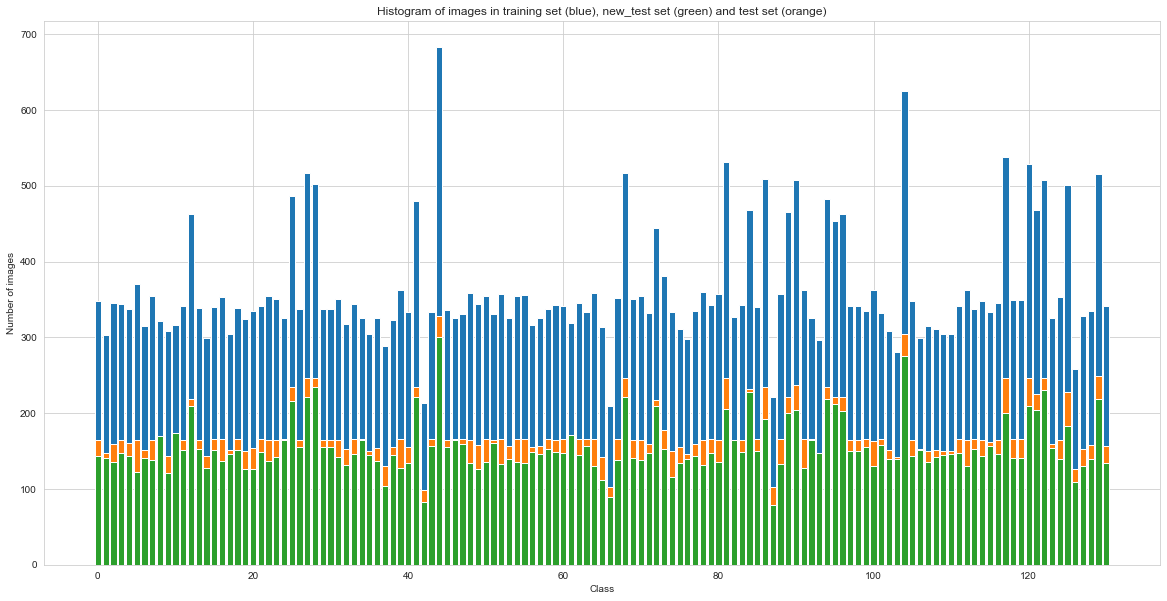

In [60]:
(intclass_train, counts_train) = np.unique(train_hot_class.argmax(1), return_counts=True)

plt.figure(figsize=(20, 10))
plt.bar(intclass_train, counts_train)
plt.title('Histogram of images in training set (blue), new_test set (green) and test set (orange)')
plt.xlabel("Class")
plt.ylabel("Number of images")

(intclass_test, counts_test) = np.unique(test_hot_class.argmax(1), return_counts=True)
plt.bar(intclass_test, counts_test)

(intclass_new_test, counts_new_test) = np.unique(new_test_hot_class.argmax(1), return_counts=True)
plt.bar(intclass_new_test, counts_new_test)
plt.show()

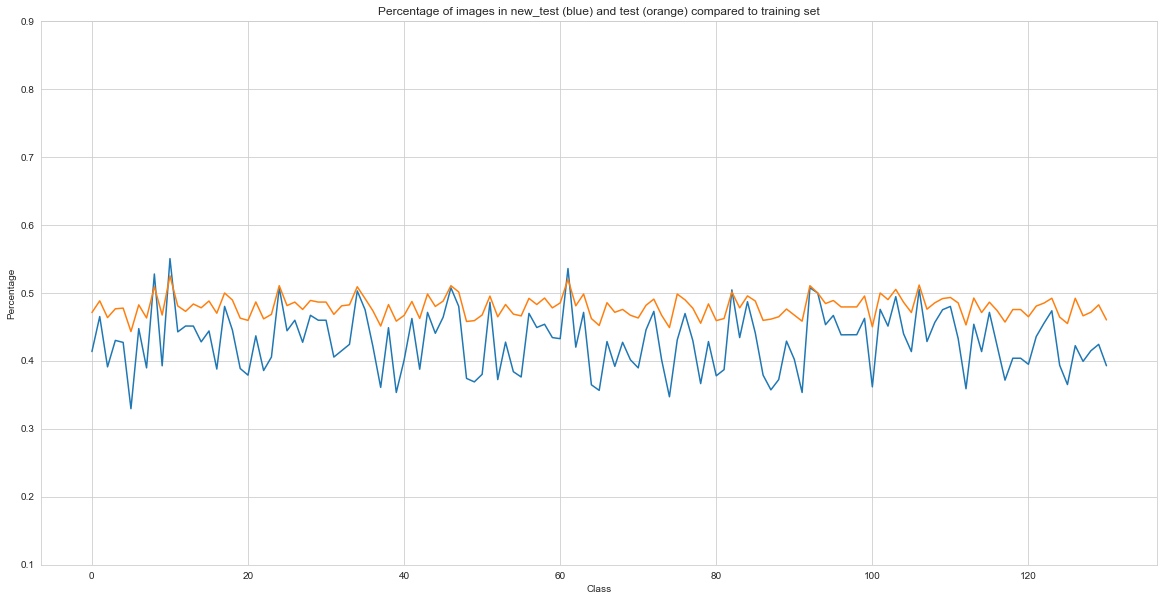

In [71]:
relative_new_test = counts_new_test / counts_train
relative_test = counts_test / counts_train
plt.figure(figsize=(20, 10))
plt.plot(relative_new_test)
plt.plot(relative_test)
plt.title('Percentage of images in new_test (blue) and test (orange) compared to training set')
plt.xlabel("Class")
plt.ylabel("Percentage")
plt.ylim([0.1,0.9])
plt.show()

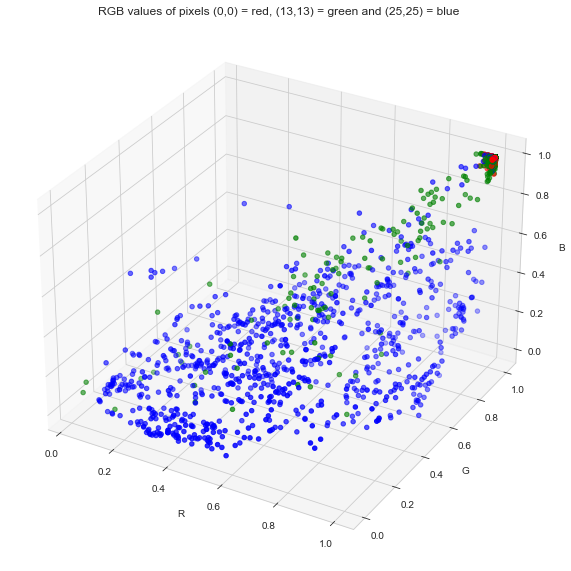

In [180]:
import pandas as pd
#how many observations for scatterplot
n_images = 1000
#what pixels for scatterplot
pixel1 = 0
pixel2 = 13
pixel3 = 25
arr1 = []
arr2 = []
arr3 = []

for i in range(n_images):
    arr1.append(train_images_array[i][pixel1][pixel1])
    arr2.append(train_images_array[i][pixel2][pixel2])
    arr3.append(train_images_array[i][pixel3][pixel3])

df1 = pd.DataFrame(arr1)
df1['pixel'] = pixel1
df2 = pd.DataFrame(arr2)
df2['pixel'] = pixel2
df3 = pd.DataFrame(arr3)
df3['pixel'] = pixel3

rgb_data = df1.append(df2.append(df3))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
colors = {pixel1:'red', pixel2:'green', pixel3:'blue'}
ax.scatter(rgb_data[0], rgb_data[1], rgb_data[2], c=rgb_data['pixel'].map(colors))
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.title('RGB values of pixels (0,0) = red, (13,13) = green and (25,25) = blue')
plt.show()

C:/Users/crysi/Private Dokumente/Papers & wissenschaftl. Arbeiten/Master/Foundations of Machine Learning/First Project/Pycharm/Fruit-Images-Dataset/Training/Cherry 2\r_263_100.jpg
C:/Users/crysi/Private Dokumente/Papers & wissenschaftl. Arbeiten/Master/Foundations of Machine Learning/First Project/Pycharm/Fruit-Images-Dataset/Training/Nut Pecan\73_100.jpg
C:/Users/crysi/Private Dokumente/Papers & wissenschaftl. Arbeiten/Master/Foundations of Machine Learning/First Project/Pycharm/Fruit-Images-Dataset/Training/Melon Piel de Sapo\r_45_100.jpg
C:/Users/crysi/Private Dokumente/Papers & wissenschaftl. Arbeiten/Master/Foundations of Machine Learning/First Project/Pycharm/Fruit-Images-Dataset/Training/Redcurrant\120_100.jpg
C:/Users/crysi/Private Dokumente/Papers & wissenschaftl. Arbeiten/Master/Foundations of Machine Learning/First Project/Pycharm/Fruit-Images-Dataset/Training/Strawberry Wedge\r_176_100.jpg
C:/Users/crysi/Private Dokumente/Papers & wissenschaftl. Arbeiten/Master/Foundations 

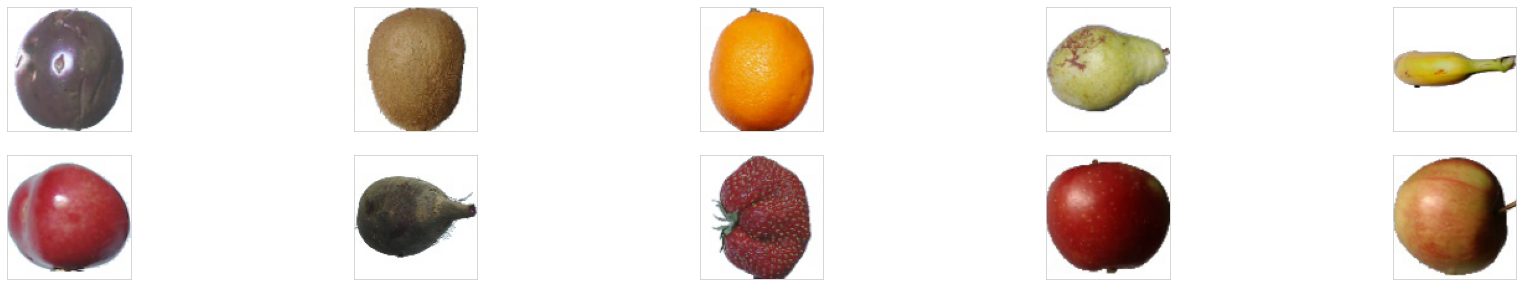

In [181]:
fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(train_images_array[i]))
    print(names_train[i])

In [182]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input , Dense ,Conv2D , MaxPooling2D , Flatten , Activation , Dropout ,Lambda
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
learning_rate = 0.1 # initial learning rate
min_learning_rate = 0.00001 # once the learning rate reaches this value , do not decrease it further
learning_rate_reduction_factor = 0.5 # the factor used when reducing the learning rate -> learning_rate *= learning_rate_reduction_factor
patience = 3 # how many epochs to wait beforereducing the learning rate when the loss plateaus
verbose = 1 # controls the amount of logging doneduring training and testing : 0 - none , 1 - reportsmetrics after each batch , 2 - reports metrics after each epoch
image_size = (100 , 100) # width and height of the used images
input_shape = (100 , 100 , 3)
num_classes = 131
img_input = Input( shape = input_shape , name='data')

x = Conv2D(16 , (5, 5) , strides =(1 , 1) , padding ='same', name='conv1')(img_input)
x = Activation('relu', name='conv1_relu')(x)
x = MaxPooling2D((2 , 2) , strides =(2 , 2) , padding ='valid', name='pool1')(x)
x = Conv2D(32 , (5, 5) , strides =(1 , 1) , padding ='same', name='conv2')(x)
x = Activation('relu', name='conv2_relu')(x)
x = MaxPooling2D((2 , 2) , strides =(2 , 2) , padding ='valid', name='pool2')(x)
x = Conv2D(64 , (5, 5) , strides =(1 , 1) , padding ='same', name='conv3')(x)
x = Activation('relu', name='conv3_relu')(x)
x = MaxPooling2D((2 , 2) , strides =(2 , 2) , padding ='valid', name='pool3')(x)
x = Conv2D(128 , (5, 5) , strides =(1 , 1) , padding ='same', name='conv4')(x)
x = Activation('relu', name='conv4_relu')(x)
x = MaxPooling2D((2 , 2) , strides =(2 , 2) , padding ='valid', name='pool4')(x)
x = Flatten()(x)
x = Dense(1024 , activation ='relu', name='fcl1')(x)
x = Dropout(0.2) (x)
x = Dense(256 , activation ='relu', name='fcl2')(x)
x = Dropout(0.2)(x)
out = Dense(num_classes , activation ='softmax', name='predictions')(x)
rez = Model(inputs =img_input , outputs =out)

In [183]:
optimizer = Adadelta(lr=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['acc'])
learning_rate_reduction= ReduceLROnPlateau(monitor ='loss', patience =patience , verbose =verbose ,factor=learning_rate_reduction_factor,min_lr=min_learning_rate)

NameError: name 'learning_rate' is not defined

In [ ]:
import csv
import pandas as pd
large_ANN = pd.read_excel('C:/Users/crysi/Private Dokumente/Papers & wissenschaftl. Arbeiten/Master/Foundations of Machine Learning/First Project/ImageClassification/grids.xlsx', header = 0, nrows = 54, sheet_name = 'large_ANN', usecols = range(0,9))
small_ANN = pd.read_excel('C:/Users/crysi/Private Dokumente/Papers & wissenschaftl. Arbeiten/Master/Foundations of Machine Learning/First Project/ImageClassification/grids.xlsx', header = 0, nrows = 36, sheet_name = 'small_ANN', usecols = range(0,9))

In [ ]:
large_ANN.index =large_ANN.iloc[:,0]
large_ANN = large_ANN.iloc[:,1:]

In [ ]:
large_ANN

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(n_colors=3, rot=-.2)#, as_cmap=True)
l = sns.relplot(
    data=large_ANN.sort_values('valid_acc'),
    x="Unnamed: 1", y="valid_acc",
    hue="dropout", style = "activation", # size="mass",
    palette=cmap, sizes=(50, 200),
)
plt.ylim(63, 102)
s = sns.relplot(
    data=small_ANN.sort_values('valid_acc'),
    x="Unnamed: 1", y="valid_acc",
    hue="dropout", style = "activation", # size="mass",
    palette=cmap, sizes=(50, 200),
)

(l.map(plt.axhline, y=np.mean(large_ANN['valid_acc']), ls='--', c='red').map(plt.axvline, x=9.5, ls='--', c='grey').set_axis_labels("Model", "Validation Accuracy"))

(s.map(plt.axhline, y=np.mean(small_ANN['valid_acc']), ls='--', c='red').map(plt.axvline, x=9.5, ls='--', c='grey').set_axis_labels("Model", "Validation Accuracy"))

plt.ylim(63, 102)
l.savefig('largeResults.png')
s.savefig('smallResults.png')

In [ ]:
np.mean(large_ANN['valid_acc'])

In [ ]:
large_ANN.sort_values('valid_acc')['valid_acc']

In [2]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))

    #hiddenlayer 2
    model.add(Dense(100)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    #model.add(Dropout(0.25))

    #hiddenlayer 3
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    #model.add(Dropout(0.25))

    #hiddenlayer 4
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    #model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [3]:
import datetime;

# ct stores current time
ct = datetime.datetime.now()
print("current time:-", ct)

# ts store timestamp of current time
ts = ct.timestamp()
print("timestamp:-", ts)

network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (new_test_images_array, new_test_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
#valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
#print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

ctEND = datetime.datetime.now()
print("current time:-", ctEND)

# ts store timestamp of current time
tsEND = ctEND.timestamp()
print("timestamp:-", tsEND)

current time:- 2022-11-17 13:14:16.941778
timestamp:- 1668690856.941778
Compiled!
Model built.
Epoch 1/100
1481/1481 - 18s - loss: 0.0153 - accuracy: 0.7281 - val_loss: 0.0135 - val_accuracy: 0.7571 - 18s/epoch - 12ms/step
Epoch 2/100
1481/1481 - 14s - loss: 0.0102 - accuracy: 0.8942 - val_loss: 0.0170 - val_accuracy: 0.6701 - 14s/epoch - 9ms/step
Epoch 3/100
1481/1481 - 10s - loss: 0.0094 - accuracy: 0.9259 - val_loss: 0.0089 - val_accuracy: 0.9472 - 10s/epoch - 7ms/step
Epoch 4/100
1481/1481 - 10s - loss: 0.0091 - accuracy: 0.9382 - val_loss: 0.0110 - val_accuracy: 0.8549 - 10s/epoch - 7ms/step
Epoch 5/100
1481/1481 - 10s - loss: 0.0088 - accuracy: 0.9493 - val_loss: 0.0095 - val_accuracy: 0.9215 - 10s/epoch - 7ms/step
Epoch 6/100
1481/1481 - 10s - loss: 0.0086 - accuracy: 0.9575 - val_loss: 0.0080 - val_accuracy: 0.9811 - 10s/epoch - 7ms/step
Epoch 7/100
1481/1481 - 10s - loss: 0.0086 - accuracy: 0.9609 - val_loss: 0.0085 - val_accuracy: 0.9631 - 10s/epoch - 6ms/step
Epoch 8/100
148

In [15]:
print(ctEND-ct)

2:46:26.229008


In [13]:
from keras.layers import Input, Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D
def build_NeuralNetwork():

    model = Sequential()

    model.add(Conv2D(16, (5, 5),input_shape= (100, 100, 3)))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))

    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (5, 5)))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))

    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (5, 5)))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))

    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5)))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))

    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(1024)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    #model.add(Dropout(0.5))

    model.add(Dense(256)) #400
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    #model.add(Dropout(0.5))

    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [14]:
# ct stores current time
ct = datetime.datetime.now()
print("current time:-", ct)

# ts store timestamp of current time
ts = ct.timestamp()
print("timestamp:-", ts)

network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 50, #32
    epochs = 25, #15
    validation_data = (new_test_images_array, new_test_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
#valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
#print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)
ctEND = datetime.datetime.now()
print("current time:-", ctEND)

# ts store timestamp of current time
tsEND = ctEND.timestamp()
print("timestamp:-", tsEND)

current time:- 2022-11-17 13:47:12.495094
timestamp:- 1668692832.495094
Compiled!
Model built.
Epoch 1/25
948/948 - 394s - loss: 0.3416 - accuracy: 0.9281 - val_loss: 0.0606 - val_accuracy: 0.9860 - 394s/epoch - 416ms/step
Epoch 2/25
948/948 - 388s - loss: 0.0422 - accuracy: 0.9894 - val_loss: 0.1143 - val_accuracy: 0.9610 - 388s/epoch - 410ms/step
Epoch 3/25
948/948 - 381s - loss: 0.0279 - accuracy: 0.9929 - val_loss: 0.0275 - val_accuracy: 0.9934 - 381s/epoch - 401ms/step
Epoch 4/25
948/948 - 377s - loss: 0.0210 - accuracy: 0.9951 - val_loss: 0.1854 - val_accuracy: 0.9412 - 377s/epoch - 397ms/step
Epoch 5/25
948/948 - 372s - loss: 0.0250 - accuracy: 0.9935 - val_loss: 0.0128 - val_accuracy: 0.9951 - 372s/epoch - 393ms/step
Epoch 6/25
948/948 - 373s - loss: 0.0235 - accuracy: 0.9933 - val_loss: 0.0146 - val_accuracy: 0.9952 - 373s/epoch - 394ms/step
Epoch 7/25
948/948 - 369s - loss: 0.0154 - accuracy: 0.9959 - val_loss: 0.0125 - val_accuracy: 0.9963 - 369s/epoch - 389ms/step
Epoch 8/2

In [16]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 96, 96, 16)        1216      
                                                                 
 batch_normalization_10 (Bat  (None, 96, 96, 16)       64        
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 96, 96, 16)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 32)        12832     
                                                                 
 batch_normalization_11 (Bat  (None, 44, 44, 32)      

In [ ]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))

    #hiddenlayer 2
    model.add(Dense(100)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    #model.add(Dropout(0.25))

    #hiddenlayer 3
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    #model.add(Dropout(0.25))

    #hiddenlayer 4
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    #model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [ ]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

In [ ]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))

    #hiddenlayer 2
    model.add(Dense(100)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Dropout(0.5))

    #hiddenlayer 3
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Dropout(0.5))

    #hiddenlayer 4
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Dropout(0.5))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [ ]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

In [ ]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))

    #hiddenlayer 2
    model.add(Dense(100)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    model.add(Dropout(0.5))

    #hiddenlayer 3
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    model.add(Dropout(0.5))

    #hiddenlayer 4
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    model.add(Dropout(0.5))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [ ]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

In [ ]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))

    #hiddenlayer 2
    model.add(Dense(100)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    model.add(Dropout(0.5))

    #hiddenlayer 3
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    model.add(Dropout(0.5))

    #hiddenlayer 4
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    model.add(Dropout(0.5))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [ ]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

In [ ]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))

    #hiddenlayer 2
    model.add(Dense(100)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Dropout(0.25))

    #hiddenlayer 3
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Dropout(0.25))

    #hiddenlayer 4
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [ ]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

In [ ]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))

    #hiddenlayer 2
    model.add(Dense(100)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    model.add(Dropout(0.25))

    #hiddenlayer 3
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    model.add(Dropout(0.25))

    #hiddenlayer 4
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [ ]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

In [ ]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))

    #hiddenlayer 2
    model.add(Dense(100)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    model.add(Dropout(0.25))

    #hiddenlayer 3
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    model.add(Dropout(0.25))

    #hiddenlayer 4
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [ ]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

In [ ]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))

    #hiddenlayer 2
    model.add(Dense(100)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    #model.add(Dropout(0.25))

    #hiddenlayer 3
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    #model.add(Dropout(0.25))

    #hiddenlayer 4
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    #model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [ ]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

In [ ]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))

    #hiddenlayer 2
    model.add(Dense(100)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    #model.add(Dropout(0.25))

    #hiddenlayer 3
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    #model.add(Dropout(0.25))

    #hiddenlayer 4
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    #model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [ ]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

In [ ]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))

    #hiddenlayer 2
    model.add(Dense(100)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    #model.add(Dropout(0.25))

    #hiddenlayer 3
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    #model.add(Dropout(0.25))

    #hiddenlayer 4
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    #model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [ ]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

In [ ]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))

    #hiddenlayer 2
    model.add(Dense(100)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Dropout(0.5))

    #hiddenlayer 3
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Dropout(0.5))

    #hiddenlayer 4
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Dropout(0.5))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [ ]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

In [ ]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))

    #hiddenlayer 2
    model.add(Dense(100)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    model.add(Dropout(0.5))

    #hiddenlayer 3
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    model.add(Dropout(0.5))

    #hiddenlayer 4
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    model.add(Dropout(0.5))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [ ]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

In [ ]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))

    #hiddenlayer 2
    model.add(Dense(100)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    model.add(Dropout(0.5))

    #hiddenlayer 3
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    model.add(Dropout(0.5))

    #hiddenlayer 4
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    model.add(Dropout(0.5))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [ ]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

In [ ]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))

    #hiddenlayer 2
    model.add(Dense(100)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Dropout(0.25))

    #hiddenlayer 3
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Dropout(0.25))

    #hiddenlayer 4
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [ ]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

In [ ]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))

    #hiddenlayer 2
    model.add(Dense(100)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    model.add(Dropout(0.25))

    #hiddenlayer 3
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    model.add(Dropout(0.25))

    #hiddenlayer 4
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [ ]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

In [ ]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))

    #hiddenlayer 2
    model.add(Dense(100)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    model.add(Dropout(0.25))

    #hiddenlayer 3
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    model.add(Dropout(0.25))

    #hiddenlayer 4
    model.add(Dense(300)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [ ]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

In [ ]:

history2=np.load('my_history.npy',allow_pickle='TRUE').item()


In [ ]:
plt.plot(history2['accuracy'])

In [ ]:
new_model = tf.keras.models.load_model('model_ann1.h5')
new_model.summary()

Model accuracy

In [ ]:
plt.figure(figsize = (6, 5))
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title('Model Accuracy', weight = 'bold', fontsize = 16)
plt.ylabel('accuracy', weight = 'bold', fontsize = 14)
plt.xlabel('epoch', weight = 'bold', fontsize = 14)
plt.ylim(0.6, 1.1)
plt.xticks(weight = 'bold', fontsize = 12)
plt.yticks(weight = 'bold', fontsize = 12)
plt.legend(['train', 'val'], loc = 'lower right', prop = {'size': 14})
plt.grid(color = 'y', linewidth = '0.5')
plt.show()

Show prediction.

In [ ]:
import matplotlib.pyplot as plt 
#plt.figure(1)
   
 # summarize history for accuracy  
   
#plt.subplot(211)
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc = 'lower right')
plt.savefig('bestANNacc.png')
 # summarize history for loss  
   


In [ ]:
#plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.show()
plt.savefig('bestANNloss.png')